### 数据描述统计
1.集中位置
2.离散程度
3.偏度，峰度
对于鸢尾花数据集：


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from mpl_toolkits.mplot3d import Axes3D            #3D坐标系
import matplotlib 
matplotlib.rcParams['axes.unicode_minus']=False   #显示中文
import seaborn as sns 
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)  #可视化主题
import missingno as msno 
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [21]:
iris=pd.read_csv(r'C:\Users\terry\Desktop\机器学习100天\Python机器学习算法与实战\program\data\chap2\Iris.csv')

iris2=iris.drop(['Id','Species'],axis=1)


#### 1.集中位置
描述集中位置的统计量有均值，中位数，众数

In [22]:
iris2.mean() #均值
iris2.median() #中位数
iris2.mode() #众数

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.0,3.0,1.5,0.2


#### 2.离散程度
描述离散程度的统计量有 方差，标准差，变异系数，分位数，极差

方差，标准差：标准差越大，数据离散程度就越大
变异系数：变异系数越大，数据越分散 计算公式=均值/标准差


In [41]:
print('极差:\n',iris2.max()-iris2.min()) 

print('方差:\n',iris2.var())

print('标准差:\n',iris2.std())

print('变异系数:\n',iris2.mean()/iris2.std())

print('分位数：\n',iris2.quantile([0,0.25,0.5,0.75,1]))


极差:
 SepalLengthCm    3.6
SepalWidthCm     2.4
PetalLengthCm    5.9
PetalWidthCm     2.4
dtype: float64
方差:
 SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64
标准差:
 SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64
变异系数:
 SepalLengthCm    7.056602
SepalWidthCm     7.043450
PetalLengthCm    2.130256
PetalWidthCm     1.570661
dtype: float64
分位数：
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0.00            4.3           2.0           1.00           0.1
0.25            5.1           2.8           1.60           0.3
0.50            5.8           3.0           4.35           1.3
0.75            6.4           3.3           5.10           1.8
1.00            7.9           4.4           6.90           2.5


#### 3.偏度和峰度
峰度 ≈ 0表示该总体数据分布与正态分布的陡缓程度相同；

峰度 >0表示该总体数据分布与正态分布相比较为陡峭，为尖顶峰；

峰度 <0表示该总体数据分布与正态分布相比较为平坦，为平顶峰。

峰度的绝对值数值越大表示其分布形态的陡缓程度与正态分布的差异程度越大。

偏度 ≈ 0表示其数据分布形态与正态分布的偏斜程度相同；

偏度 >0表示其数据分布形态与正态分布相比为正偏（右偏），即有一条长尾巴拖在右边，数据右端有较多的极端值，数据均值右侧的离散程度强；

偏度 <0表示其数据分布形态与正态分布相比为负偏（左偏），即有一条长尾拖在左边，数据左端有较多的极端值，数据均值左侧的离散程度强

偏度的绝对值数值越大表示其分布形态的偏斜程度越大。

In [45]:
print('偏度:\n',iris2.skew()) 

print('峰度:\n',iris2.kurtosis()) 

偏度:
 SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64
峰度:
 SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64


#### 4.Pearson系数

皮尔逊相关系数用于度量两个变量(X和Y)之间的线性相关程度，其值介于-1与1之间。随着X增大，Y是否同时增大或者减小；当二者分布在一条直线上时，皮尔逊相关系数等于1或-1; 两个变量之间没有线性关系，皮尔逊相关系数为0

0.8-1.0 极强相关
0.6-0.8 强相关
0.4-0.6 中等程度相关
0.2-0.4 弱相关
0.0-0.2 极弱相关或无相关

iris2.columns

p1=iris2['SepalLengthCm'].corr(iris2['SepalWidthCm'],method='pearson') #计算两个特征之间的相关系数

iris2corr=iris2.corr(method='pearson')
plt.figure(figsize=(8,8))
ax=sns.heatmap(iris2corr,annot=True,fmt='.3f',square=True,cmap="YlGnBu")
ax.set_yticklabels(iris2corr.index.values,va="center")

#### 5.单个数据变量的分布情况

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, '取值')

Text(0, 0.5, '频数')

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 <a list of 20 Patch objects>)

array([50, 50, 50], dtype=int64)

array(['versicolor', 'virginica', 'setosa'], dtype=object)

Text(0.5, 0, '数据种类')

Text(0, 0.5, '频数')

<BarContainer object of 3 artists>

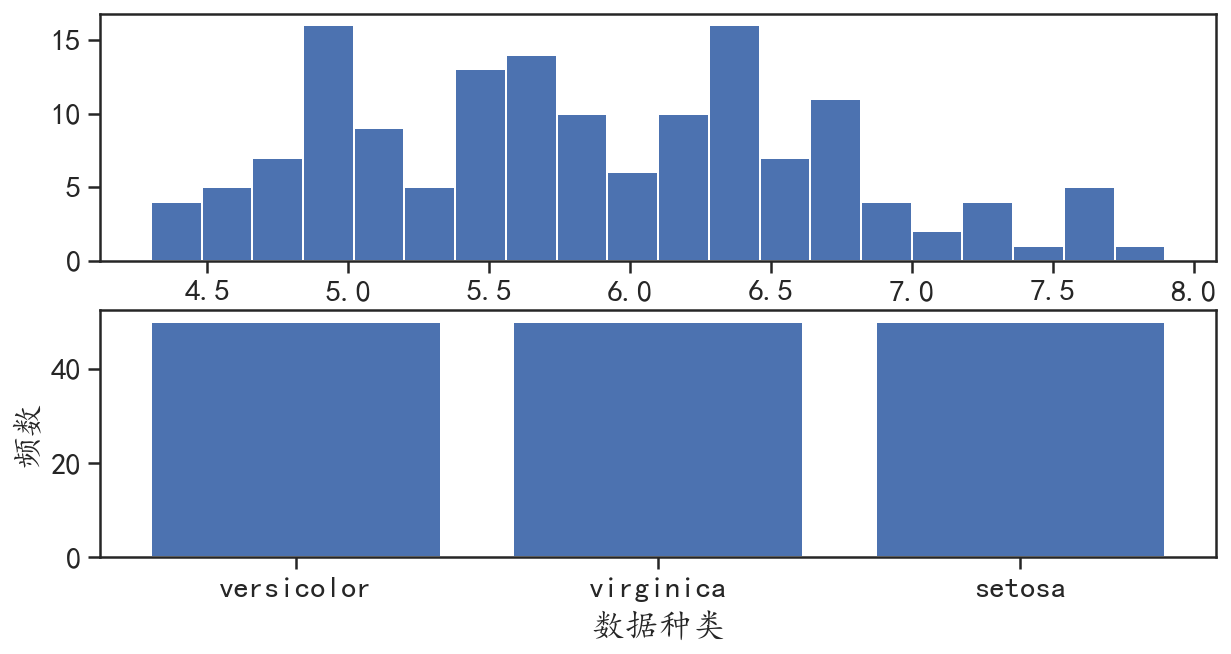

In [127]:
iris2['SepalLengthCm']
plt.figure(figsize=(10,5))
plt.xlabel('取值')
plt.ylabel('频数')
plt.subplot(2,1,1)
plt.hist(iris2.SepalLengthCm,bins=20) #直方图

# iris.Species.value_counts()        #返回包含每个值的数量的Series
# type(iris.Species.value_counts())
iris.Species.value_counts().values
iris.Species.value_counts().index.values
plt.subplot(2,1,2)
plt.xlabel('数据种类')
plt.ylabel('频数')
plt.bar(iris.Species.value_counts().index.values,iris.Species.value_counts().values)  


### 异常值发现
1. 3sigma法则：超过均值3倍标准差的数据被认为是异常值，即数据的值-mean>3*std
2. 箱体图

#### 1.3sigma法则

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'KNNImputer')

Text(0.5, 0, 'AirTemp')

Text(0, 0.5, 'Humidity')

Year               0
Latitude           0
Longitude          0
SeaSurfaceTemp     0
AirTemp            0
Humidity           0
UWind              6
VWind             10
dtype: int64

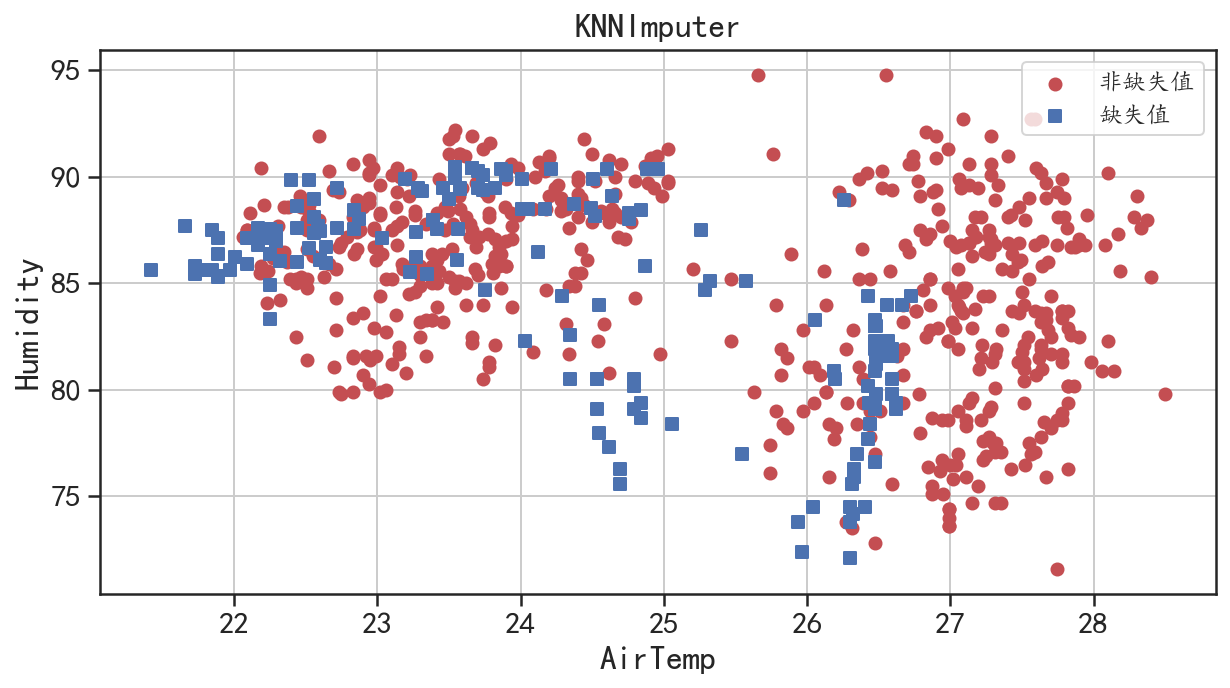

In [146]:
#KNN Imputer 进行缺失值处理
from sklearn.impute import KNNImputer
oceandf = pd.read_csv(r'C:\Users\terry\Desktop\机器学习100天\Python机器学习算法与实战\program\data\chap2\热带大气海洋数据.csv')
nanindex=oceandf.AirTemp.isnull()|oceandf.Humidity.isnull()
knnImputer=KNNImputer()
knnoceandf=knnImputer.fit_transform(oceandf)
AirTemp2=knnoceandf[:,4]
Humanity2=knnoceandf[:,5]
plt.figure(figsize=(10,5))
plt.grid()
plt.title('KNNImputer')
plt.xlabel('AirTemp')
plt.ylabel('Humidity')
plt.scatter(AirTemp2[~nanindex],Humanity2[~nanindex],marker='o',c='r',label='非缺失值')
plt.scatter(AirTemp2[nanindex],Humanity2[nanindex],marker='s',c='b',label='缺失值')
plt.legend(loc='upper right',fontsize=12)

#-------------------------------------------------------------------------------------------------------------

knnoceandftoDF=pd.DataFrame(knnoceandf,columns=oceandf.columns.values)

knnoceandftoDFmean=knnoceandftoDF.mean()
knnoceandftoDFstd=knnoceandftoDF.std()

outliers=abs(knnoceandftoDF-knnoceandftoDFmean)>3*knnoceandftoDFstd  #3sigma法则
outliers.sum()



<Figure size 720x360 with 0 Axes>

Index(['Year', 'Latitude', 'Longitude', 'SeaSurfaceTemp', 'AirTemp',
       'Humidity', 'UWind', 'VWind'],
      dtype='object')

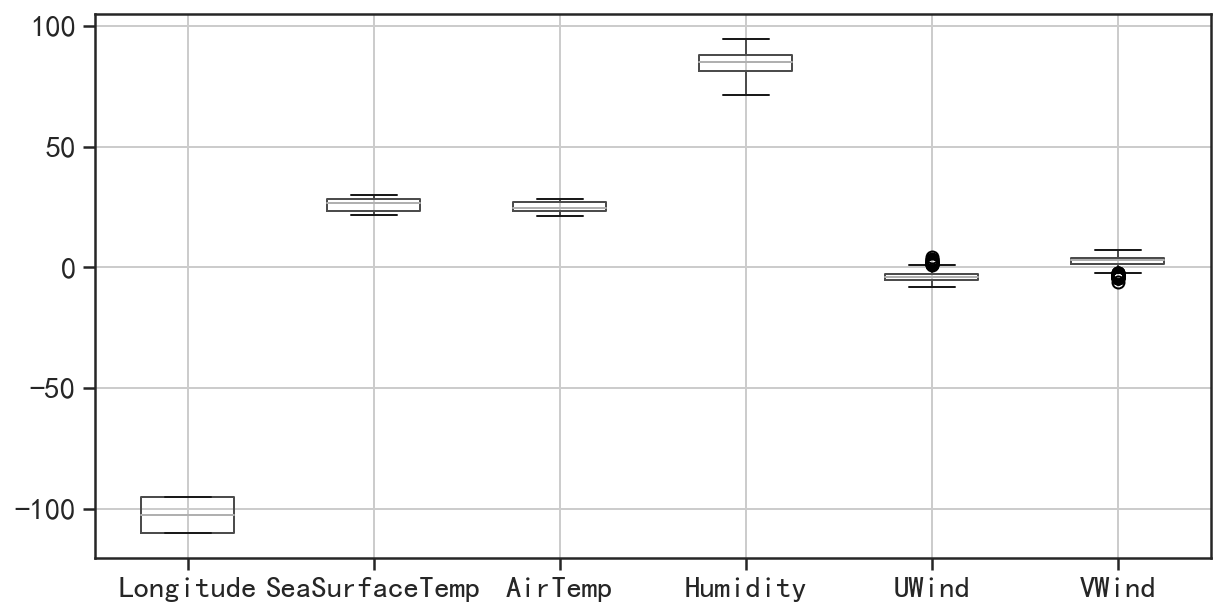

In [156]:
plt.figure(figsize=(10,5))
oceandf.columns
oceandf.boxplot(column=['Longitude', 'SeaSurfaceTemp', 'AirTemp','Humidity', 'UWind', 'VWind'])